In [ ]:
#Build a predictive model to estimate the price of real estate properties based on various features such as location, 
#size, number of bedrooms, and other relevant factors in the dataset.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("real_estate_dataset.csv")

In [5]:
df

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583,488496.350722
496,497,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105,657736.921717
497,498,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264,405324.950201
498,499,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684,773035.968028


In [7]:
df.isna().sum()

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

In [9]:
df.corr(numeric_only=True)    #finds the correlational values

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
ID,1.000000,0.051102,0.014511,0.027395,-0.006343,0.028548,-0.005307,-0.076580,-0.000137,-0.045071,-0.006751,0.031774
Square_Feet,0.051102,1.000000,-0.049918,-0.001667,0.056873,-0.055062,-0.000978,0.007530,-0.051598,-0.035270,0.093080,0.558604
Num_Bedrooms,0.014511,-0.049918,1.000000,-0.056808,0.009088,0.031806,0.017429,0.012039,-0.065481,-0.000357,0.040511,0.563973
Num_Bathrooms,0.027395,-0.001667,-0.056808,1.000000,-0.040895,-0.013407,-0.037040,-0.024880,0.055707,-0.013855,-0.082571,0.156689
Num_Floors,-0.006343,0.056873,0.009088,-0.040895,1.000000,0.046922,0.033256,-0.045630,-0.082763,0.019928,0.035164,0.177435
Year_Built,0.028548,-0.055062,0.031806,-0.013407,0.046922,1.000000,0.000693,-0.065056,-0.008105,0.009614,-0.015113,0.418293
Has_Garden,-0.005307,-0.000978,0.017429,-0.037040,0.033256,0.000693,1.000000,-0.087085,-0.037998,0.019130,0.040305,0.109196
Has_Pool,-0.076580,0.007530,0.012039,-0.024880,-0.045630,-0.065056,-0.087085,1.000000,0.011477,-0.088722,0.110382,0.136579
Garage_Size,-0.000137,-0.051598,-0.065481,0.055707,-0.082763,-0.008105,-0.037998,0.011477,1.000000,-0.029939,-0.061407,0.032100
Location_Score,-0.045071,-0.035270,-0.000357,-0.013855,0.019928,0.009614,0.019130,-0.088722,-0.029939,1.000000,0.054446,0.071326


In [11]:
import seaborn as sns

<Axes: >

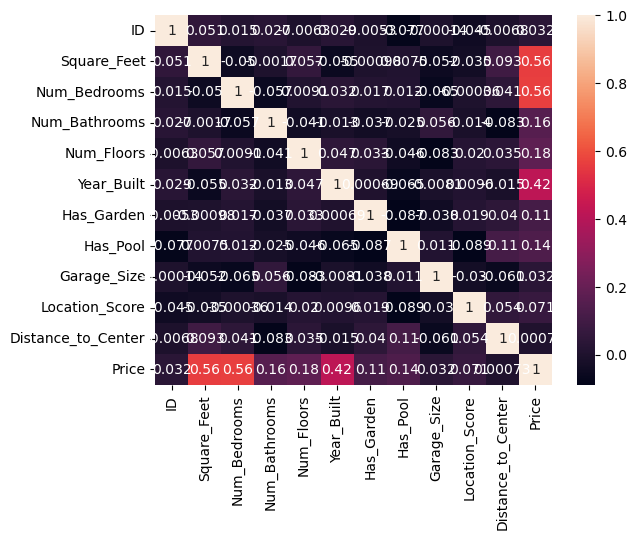

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [15]:
df.columns

Index(['ID', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
       'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score',
       'Distance_to_Center', 'Price'],
      dtype='object')

<Axes: ylabel='Density'>

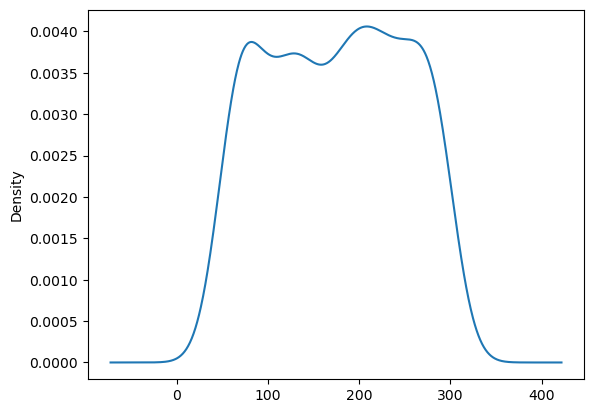

In [21]:
df['Square_Feet'].plot(kind='kde')

In [23]:
target=df["Price"]

In [27]:
feature=df[['Square_Feet']]

In [29]:
from sklearn.model_selection import train_test_split   #unseen data train and test

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2)  #20% for test and 80 for train

In [35]:
model=LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
model.predict(x_test)

array([561439.8970996 , 493125.98463472, 670468.99732083, 585348.47156899,
       562217.35748454, 668359.3122331 , 488979.7456427 , 496073.5761961 ,
       686777.2780299 , 485910.66753718, 684222.84148574, 524673.9568118 ,
       630374.41504612, 658600.67718672, 692832.93875682, 674917.14805872,
       645526.04060228, 641681.28926855, 588730.27258435, 480264.79988024,
       681251.29822298, 663067.67279224, 503463.58355957, 526039.4104502 ,
       570564.24409041, 578511.51861609, 546075.19038922, 635472.31245491,
       580361.25855016, 493990.82994351, 559162.58975715, 671657.60943259,
       562107.16101097, 652031.49120914, 493827.04826972, 652351.87373334,
       530792.02056633, 497608.30134167, 490027.60501154, 497625.80150088,
       612488.1388844 , 604565.65282686, 597153.41195265, 573397.4801243 ,
       518320.81217769, 599081.09146303, 535399.30408474, 520365.21976822,
       547996.69800385, 562331.25181364, 687750.8017991 , 654696.79187224,
       540731.22629181, 6

In [41]:
y_pred=model.predict(x_test)

In [43]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [45]:
r2_score(y_pred,y_test)   #variance in the target variable

-1.5317914894436462

In [47]:
mean_squared_error(y_pred,y_test)  #Mean Absolute Error.

11311135800.563574

In [49]:
mean_absolute_error(y_pred,y_test)

86666.11653576691